In [1]:
from data_formats import read_data
from dose_reponse_fit import dose_response_fit, StandardSettings
import matplotlib.pyplot as plt
from plotting import *
from stress_survival_conversion import stress_to_survival, survival_to_stress
import random
import glob
from tqdm import tqdm

import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
files = []

for i in glob.glob("data/*.xlsx"):
    data = read_data(i)
    
    if data.meta.chemical in ["Clothianidin", "Esfenvalerate", "BPS"]:
        files.append(data)
        
        
fits = []
for data in files:
    data : ExperimentData
    for stressor in data.additional_stress:
        
        settings = StandardSettings(survival_max=data.meta.max_survival, len_curves = 100)

        main_fit = dose_response_fit(data.main_series, settings)

        stress_fit = dose_response_fit(data.additional_stress[stressor], settings)
        
        fits.append((data, stressor, main_fit, stress_fit))

In [24]:
x1s, x2s, ys = [], [], []

for data, stressor, main_fit, stress_fit in fits:
    
    main_fit : ModelPredictions
    stress_fit : ModelPredictions
    
    x1s.append(main_fit.survival_curve / data.meta.max_survival)
    x2s.append(np.ones_like(main_fit.survival_curve) * stress_fit.optim_param["d"])
    
    ys.append(stress_fit.survival_curve / data.meta.max_survival)
    
X = np.stack((np.concatenate(x1s), np.concatenate(x2s)), axis = 1)
y = np.concatenate(ys)
X.min(), X.max(), y.min(), y.max(), X.shape, y.shape

(0.00017854006518621809,
 1.0,
 8.132729453932944e-07,
 0.9999999083250408,
 (3700, 2),
 (3700,))

In [8]:
default_pysr_params = dict(
    populations=30,
    model_selection="best",
)

model = PySRRegressor(
    niterations=40,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["cos", "exp", "sin"],
    **default_pysr_params
)

model.fit(X, y)

/home/felix/miniconda3/envs/sam/lib/python3.12/site-packages/pysr/sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [3700, 100]

In [9]:
model.sympy()

NotFittedError: This PySRRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [10]:

for data, stressor, main_fit, stress_fit in fits:
    
    main_fit : ModelPredictions
    stress_fit : ModelPredictions
    
    x1s  = main_fit.survival_curve / data.meta.max_survival 
    x2s = np.ones_like(main_fit.survival_curve) * stress_fit.optim_param["d"]
    
    x = np.stack((x1s,x2s), axis=1)
    
    
    
    y = stress_fit.survival_curve / data.meta.max_survival
    
    plt.plot(model.predict(x))
    plt.plot(y)
    plt.show()

NotFittedError: This PySRRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [5]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Make predictions
y_pred = poly_model.predict(X)

r2_score(y, y_pred)

0.9489758154822157

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


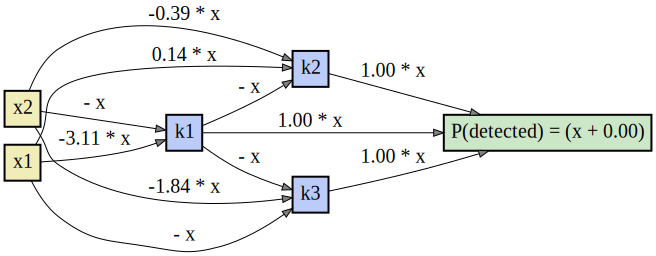

In [21]:
darts_estimator.fit(x, y)
darts_estimator.visualize_model()

In [15]:
X.shape

(3700, 2)

In [20]:
y.shape

(3700,)

In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your dose-response data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model
svr_rbf.fit(X_train, y_train)

# Make predictions
y_pred = svr_rbf.predict(X_test)

r2_score(y_test, y_pred)

0.9474115130236672

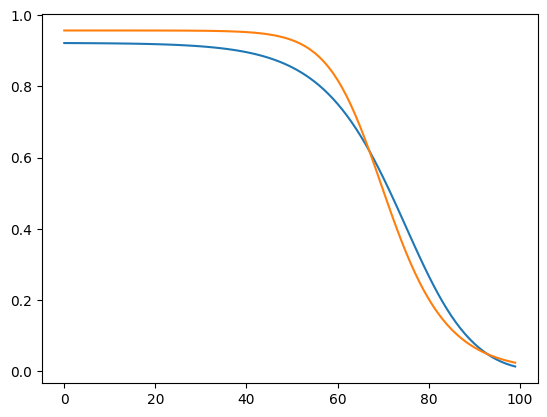

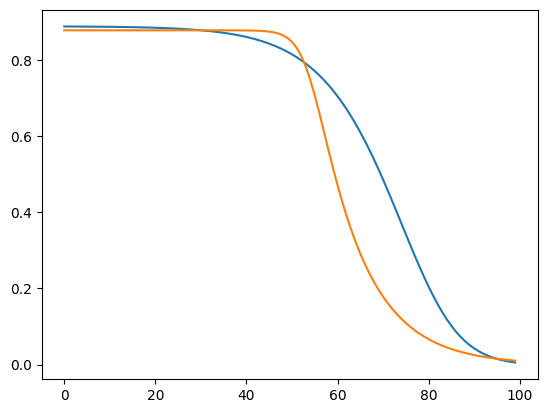

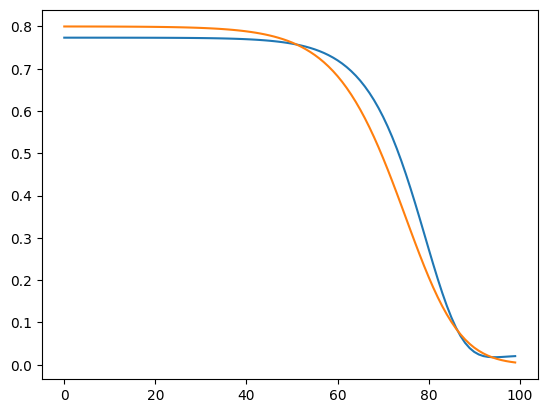

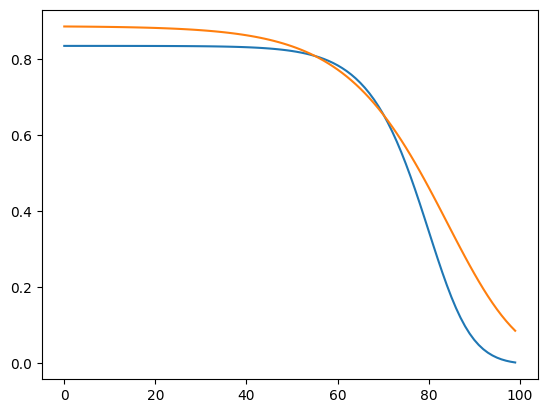

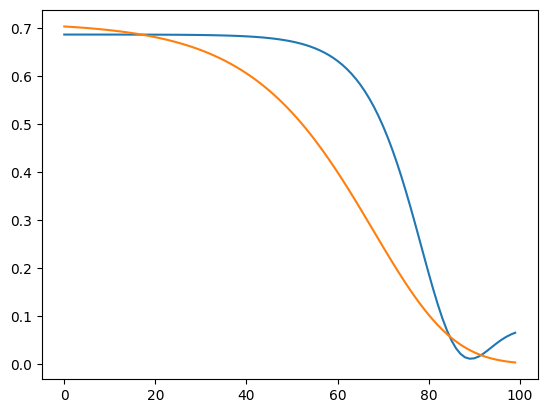

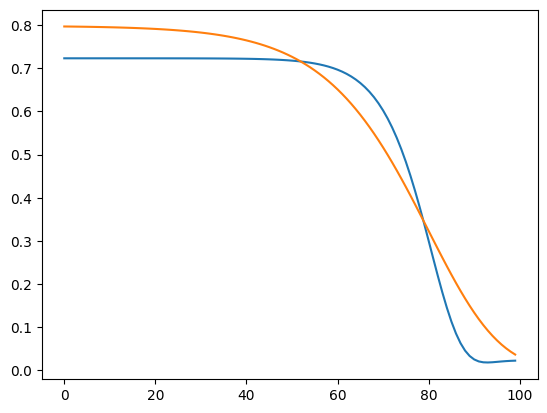

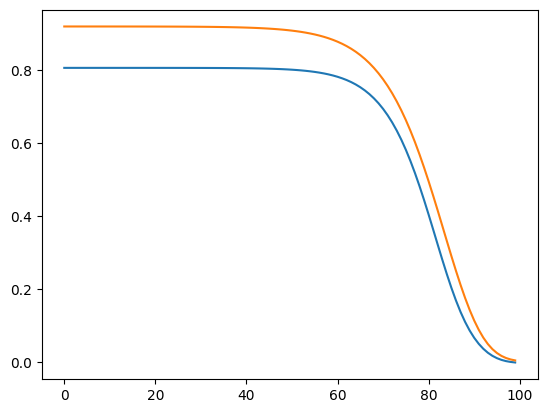

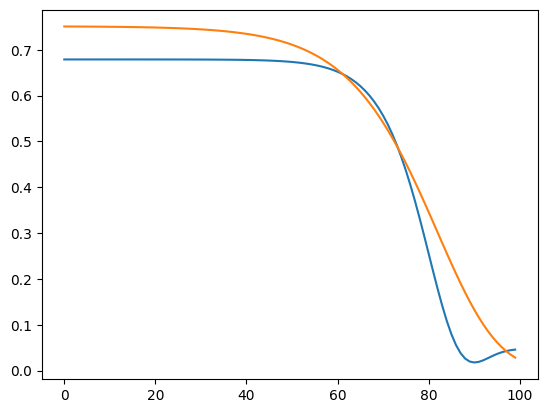

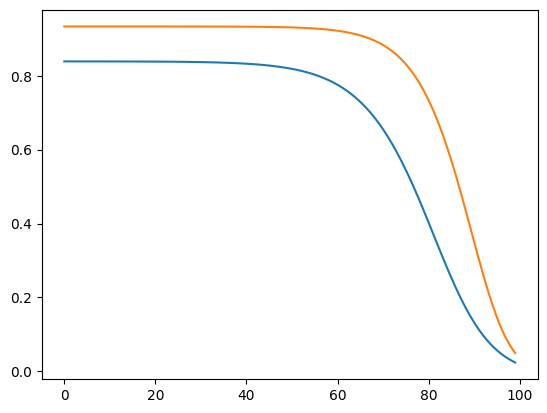

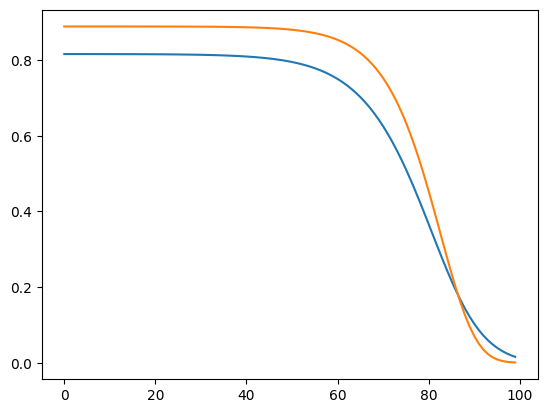

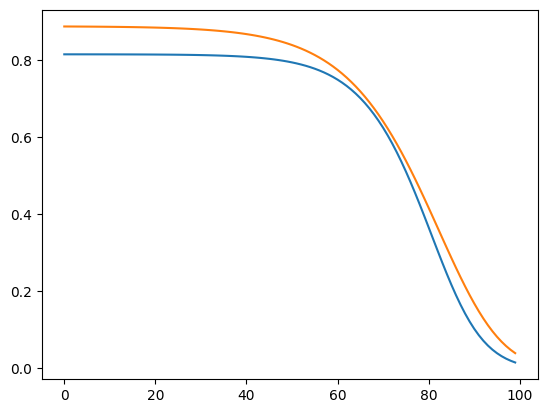

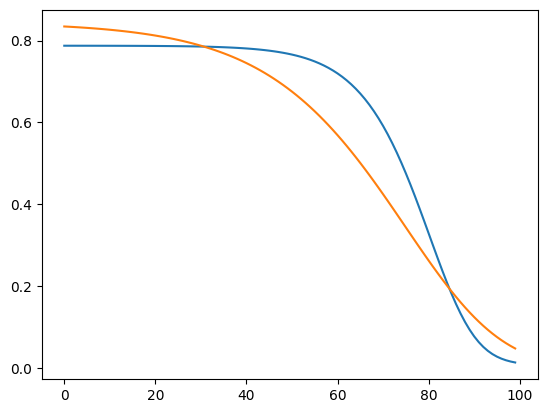

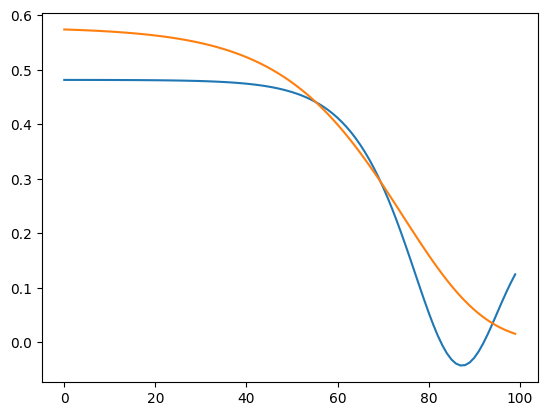

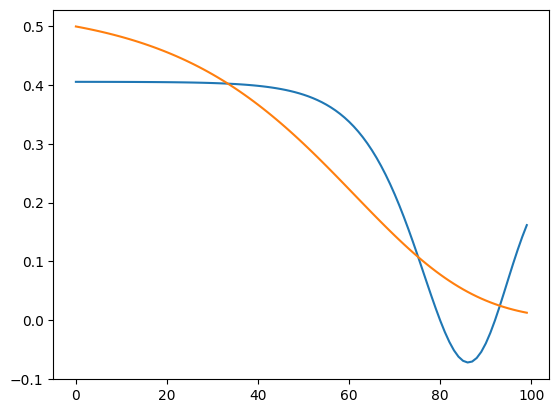

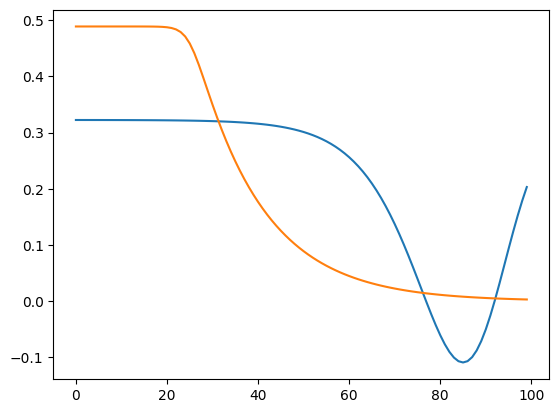

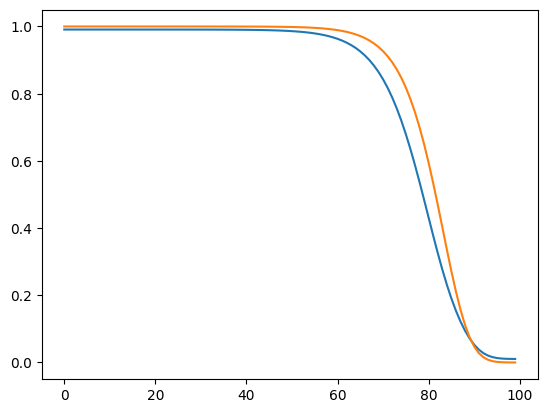

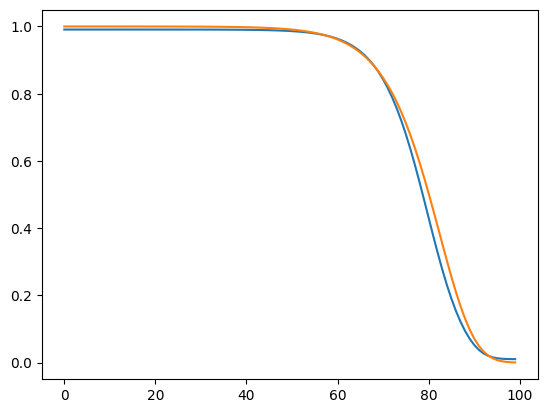

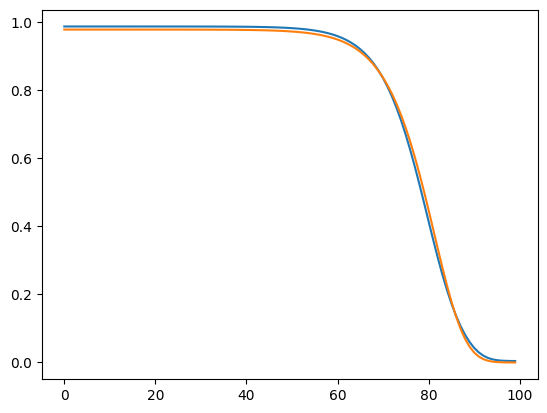

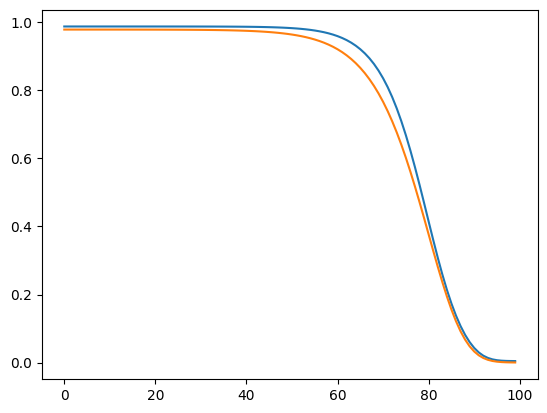

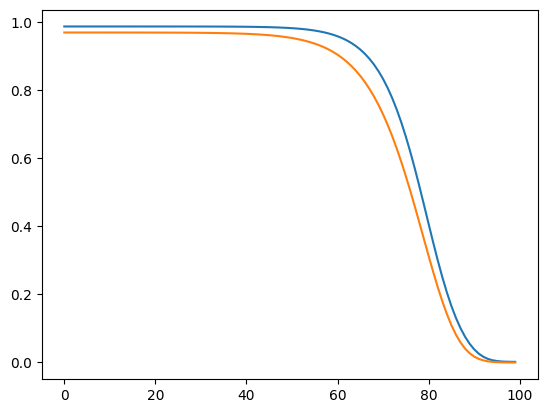

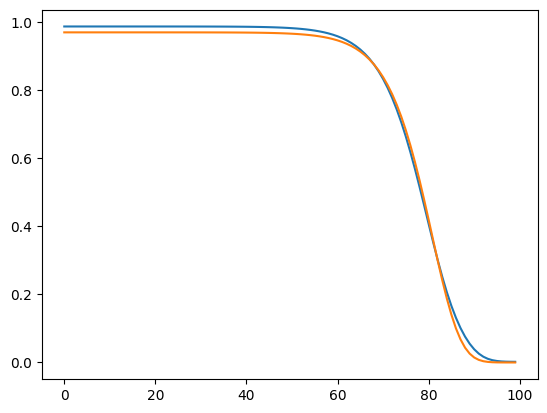

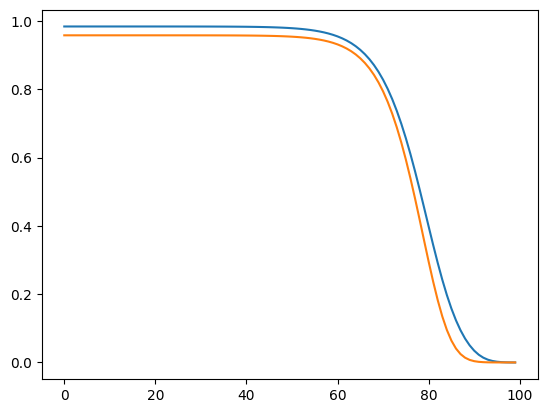

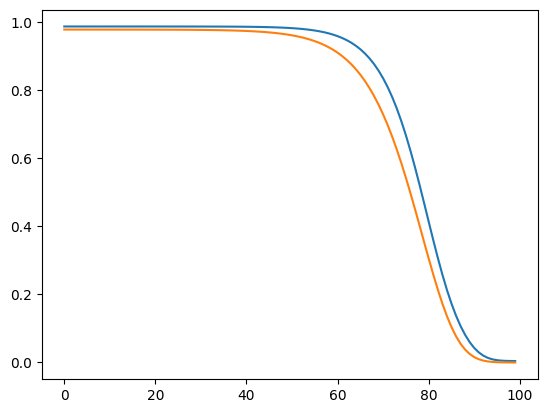

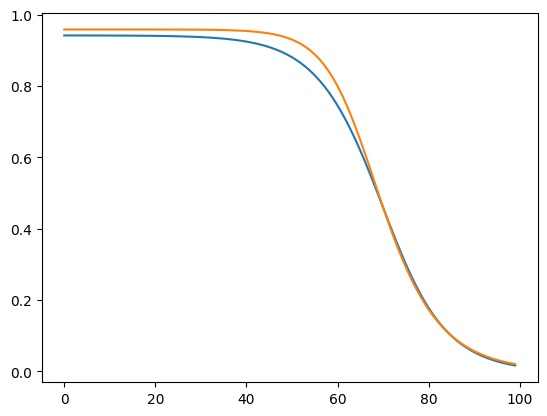

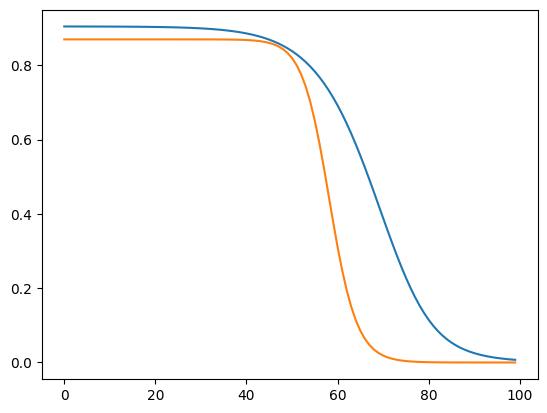

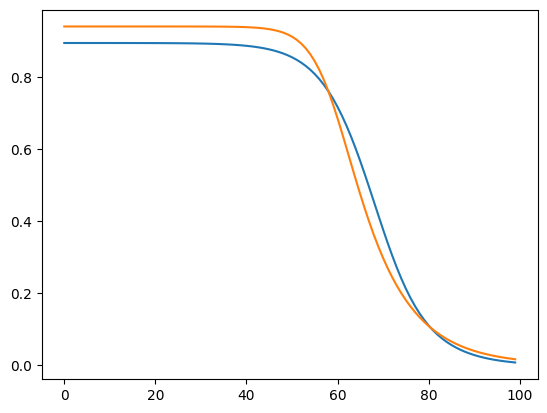

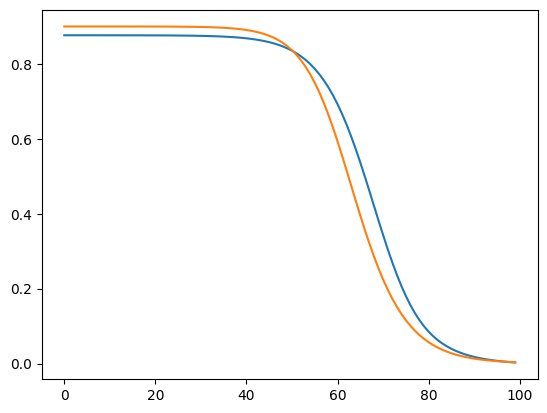

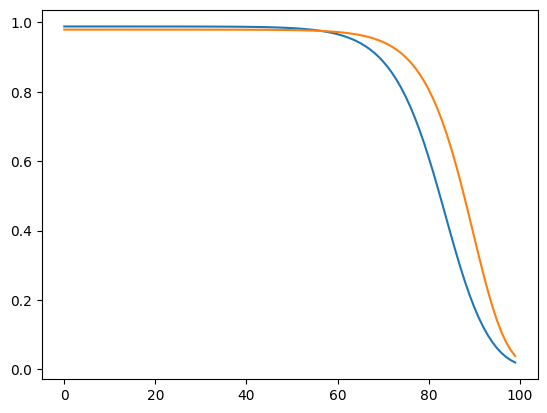

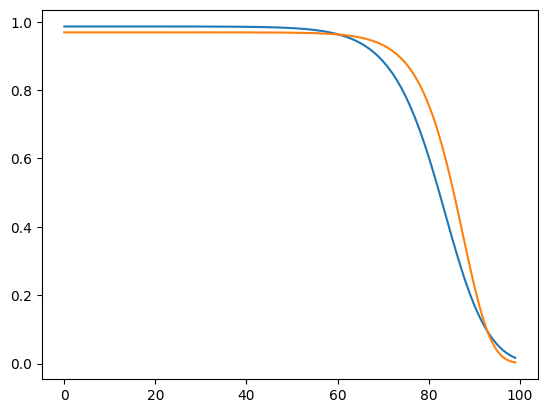

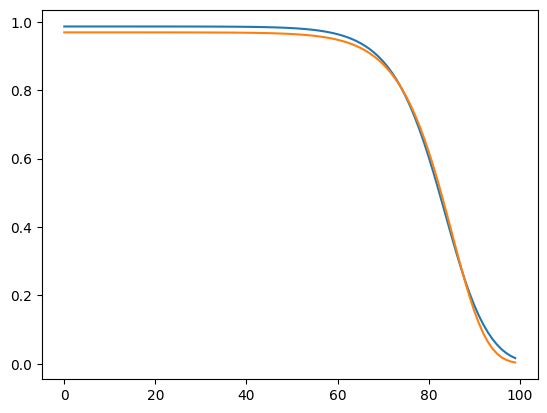

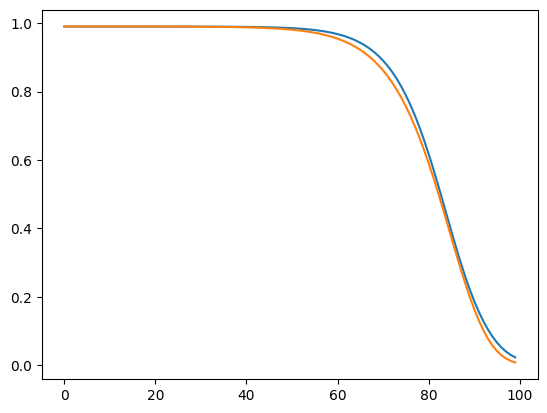

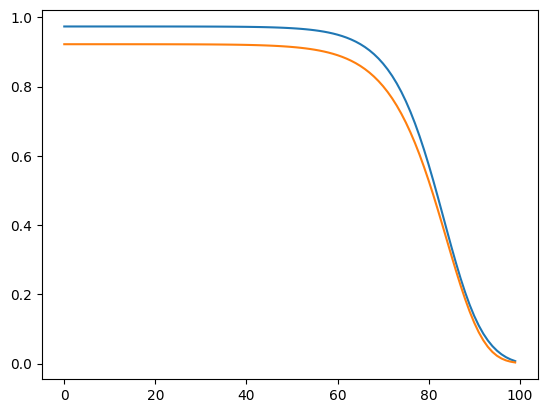

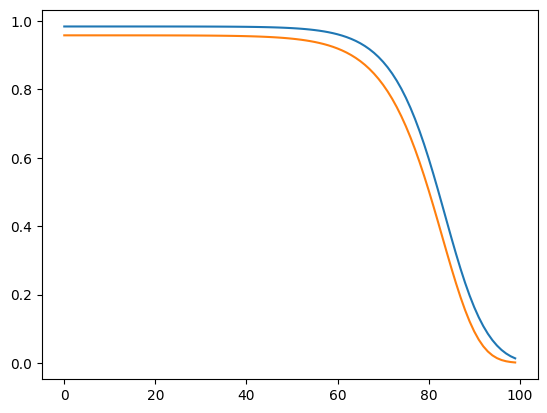

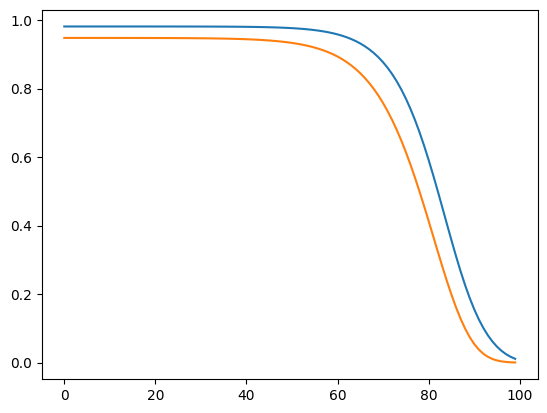

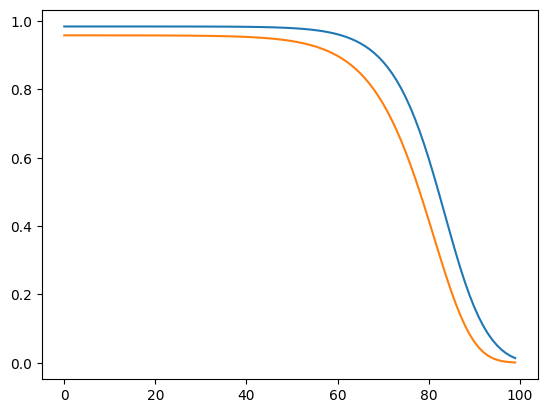

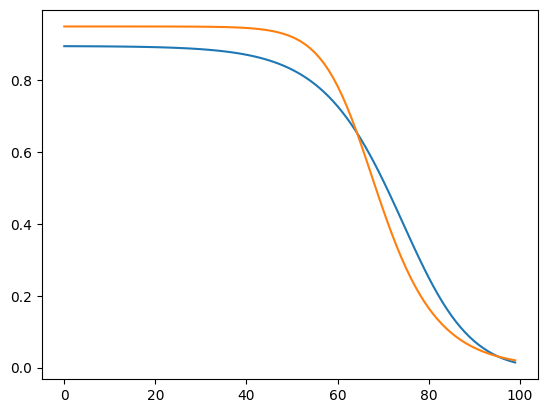

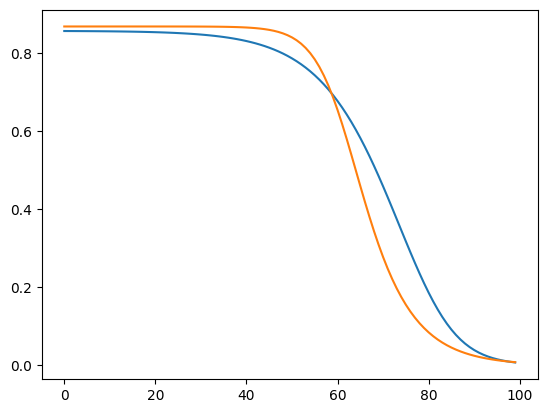

In [26]:

for data, stressor, main_fit, stress_fit in fits:
    
    main_fit : ModelPredictions
    stress_fit : ModelPredictions
    
    x1s  = main_fit.survival_curve / data.meta.max_survival 
    x2s = np.ones_like(main_fit.survival_curve) * stress_fit.optim_param["d"]
    
    x = np.stack((x1s,x2s), axis=1)
    
    
    
    k = stress_fit.survival_curve / data.meta.max_survival
    
    plt.plot(poly_model.predict(x), label = "label")
    plt.plot(k, label = "pred")
    
    plt.show()

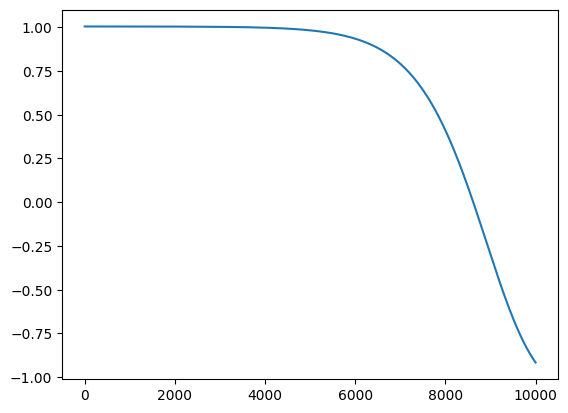

In [23]:
plt.plot(darts_estimator.predict(x))